<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/dnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento de un Perceptrón Multi-Capa con datos de dígitos (MNIST)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt
tf.random.set_seed(42)

## Carga de los datos
#### Tamaño del conjunto de entrenamiento y de test

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
#imaggenes entrada, son numeros escritos
#las salidas son etiquetas
print(' -Entradas Entrenamiento:', X_train.shape) # 28x28 son los píxeles
#si tengo otro tipo se datos, puedo tener 60000, 1 (1=columna=variables)
print(' -Salidas Entrenamiento:', y_train.shape)
print(' -Entradas Test:', X_test.shape)
print(' -Salidas Test:', y_test.shape)
#si las imagenes no son iguales, podemos hacer padding, que es rellenar con píxeles
#tambien se podría reescalar, además, no interesa utlizar tamaños gigantes

 -Entradas Entrenamiento: (60000, 28, 28)
 -Salidas Entrenamiento: (60000,)
 -Entradas Test: (10000, 28, 28)
 -Salidas Test: (10000,)


#### Visualización de las entradas

Valores de salida correspondientes a las imágenes de entrada [5 0 4]


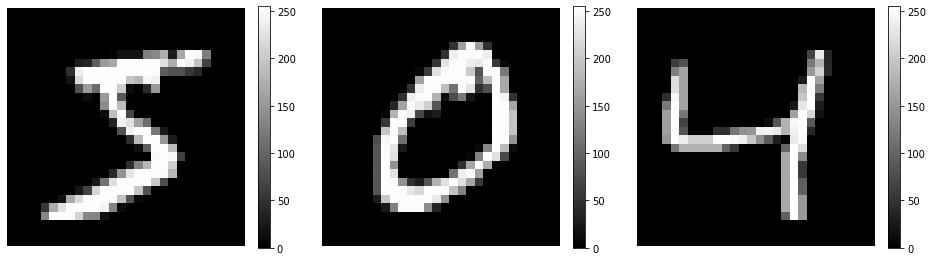

In [3]:
n_img_show = 3

# Plot images
plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');
#vemos ahora que todas las imagenes estane scaladas de 0 a 257
#la y es la etiqueta que le asigno a cada imagen
#además, es un problema de clasificación de 10 clases (0 a 9)
#categorycal:cros_entropy
#la capa de salida tiene 10 neuronas
#función activación. Softmax: para problemas de clasif de más de 2 clases
#si tuviera 2 clases, utilizaría la sigmoide, 
#para problema de regresión utilizaría una lineal o regresion, ya que no necesito acotar ni medir como una probabilidad
#
print(f'Valores de salida correspondientes a las imágenes de entrada {y_train[0:n_img_show]}')

## Preparación de los datos
#### Normalización

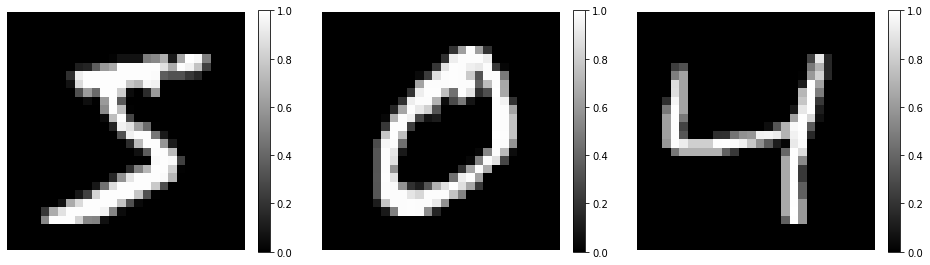

In [4]:
# Normalizamos a valores entre 0 y 1
X_train = X_train.astype('float32')/255 #normalizo entre 0 y 1
X_test = X_test.astype('float32')/255

plt.figure(figsize=(16,10))
for i in range(n_img_show):
    plt.subplot(1, n_img_show, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.colorbar(fraction=0.046)
    plt.axis('off');

#### Reajuste del tamaño de la entrada y la salida

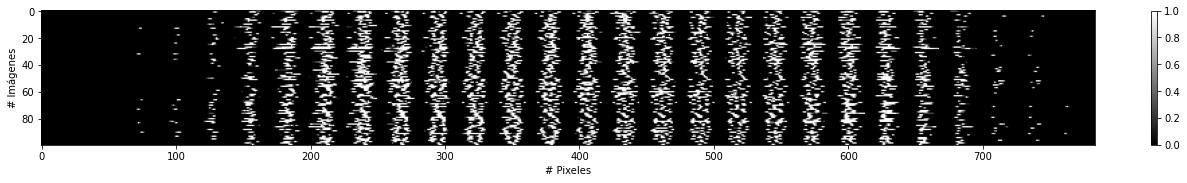

In [5]:
x_shape = X_train.shape
X_train = X_train.reshape(x_shape[0], x_shape[1]*x_shape[2])
X_test = X_test.reshape(len(X_test), x_shape[1]*x_shape[2])
y_train = y_train[:, None]
y_test = y_test[:, None]

# Dibujar la nueva entrada
plt.figure(figsize=(20, 70))
plt.imshow(X_train[0:100], cmap='gray')
plt.xlabel('# Pixeles')
plt.ylabel('# Imágenes')
plt.colorbar(fraction=0.006);
#aqui represento en cada fila un vector de imagenes, como si fueran una imagen

## Definición del modelo
Crea un modelo con las siguientes capas:
1. Capa de entrada con tantas entradas como número de píxeles (784) 
2. Capa oculta con 256 neuronas
3. Capa oculta con 128 neuronas
4. Capa oculta con 64 neuronas
5. Capa oculta con 32 neuronas
6. Capa de salidad con tantas neuronas como salidas (10)

Todas las capas usan función de activación relu (menos la de salida). ¿Qué función de activación hay que poner a la salida?


In [10]:
# Algunos hiper-parámetros
lr = .001
batch_size = 512
n_epochs = 35
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Crear modelo
from tensorflow import keras
#keras.backend.clear_session()
model = keras.Sequential()  #crear modelo
#ahora añado las capas
#model.add(keras.layers.Flatten(input_shape=[28,28])) #input
#model.add(keras.layers.Dense(256,activation='relu')) 
#model.add(keras.layers.Dense(128,activation='relu'))
#model.add(keras.layers.Dense(64,activation='relu'))
#model.add(keras.layers.Dense(32,activation='relu'))
#model.add(keras.layers.Dense(10,activation='softmax'))
model.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
#X_train incluye el flatten, si he hecho train arriba, hora no hago flatten
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


# Visualizar arquitectura y dimensiones
model.summary()
#y = [0, 0, 0, 1, 0, .... 0] #10 salidas, esto lo consigo con sparse

# Compilamos el modelo: ¿Qué función de coste hay que utilizar?
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento del modelo

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/35
118/118 [==============================] - 2s 16ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 2/35
118/118 [==============================] - 2s 16ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 3/35
118/118 [==============================] - 2s 16ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 4/35
118/118 [==============================] - 2s 16ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 5/35
118/118 [==============================] - 2s 16ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 6/35
118/118 [==============================] - 2s 15ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 7/35
118/118 [==============================] - 2s 16ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980

In [11]:
hist = model.fit(X_train, 
                 y_train, 
                 batch_size=batch_size, 
                 epochs=n_epochs, 
                 verbose=1, 
                 shuffle=True,
                 validation_data=(X_test, y_test))

Epoch 1/35
118/118 [==============================] - 2s 15ms/step - loss: 0.5059 - accuracy: 0.8526 - val_loss: 0.2061 - val_accuracy: 0.9420
Epoch 2/35
118/118 [==============================] - 2s 14ms/step - loss: 0.1591 - accuracy: 0.9538 - val_loss: 0.1445 - val_accuracy: 0.9583
Epoch 3/35
118/118 [==============================] - 2s 14ms/step - loss: 0.1098 - accuracy: 0.9673 - val_loss: 0.1045 - val_accuracy: 0.9686
Epoch 4/35
118/118 [==============================] - 2s 14ms/step - loss: 0.0815 - accuracy: 0.9755 - val_loss: 0.0883 - val_accuracy: 0.9725
Epoch 5/35
118/118 [==============================] - 2s 13ms/step - loss: 0.0629 - accuracy: 0.9810 - val_loss: 0.0881 - val_accuracy: 0.9724
Epoch 6/35
118/118 [==============================] - 2s 13ms/step - loss: 0.0518 - accuracy: 0.9847 - val_loss: 0.0823 - val_accuracy: 0.9757
Epoch 7/35
118/118 [==============================] - 2s 13ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0736 - val_accuracy: 0.9791

### Dibujar las curvas de entrenamiento/validación

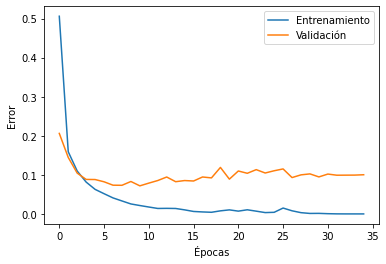

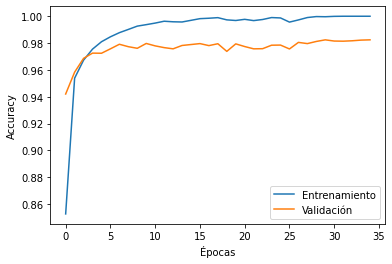

In [12]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right');

plot_curves(hist.history)
#a él le sale diferente. salen muy separadas por lo que bajan a la par pero lleva a un punto donde
#se separan, y va banando el entrenamiento

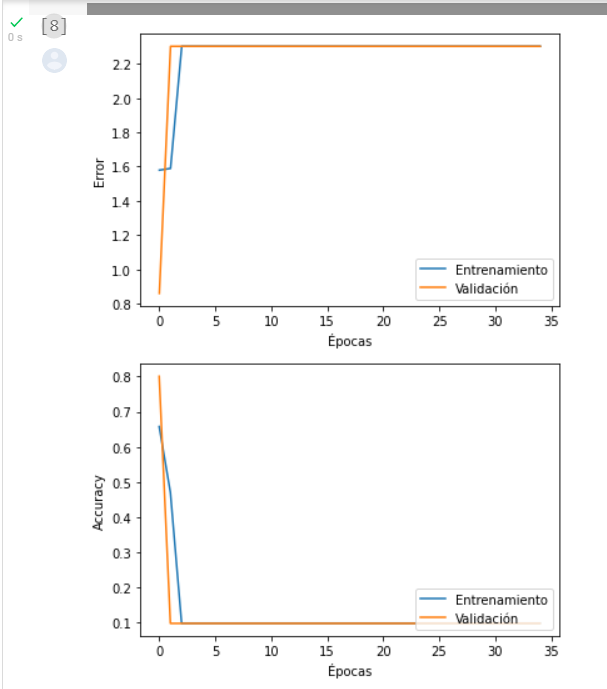

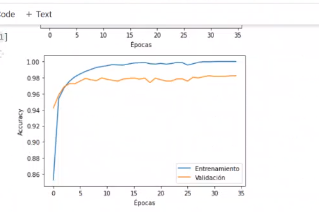

### Visualización de los pesos

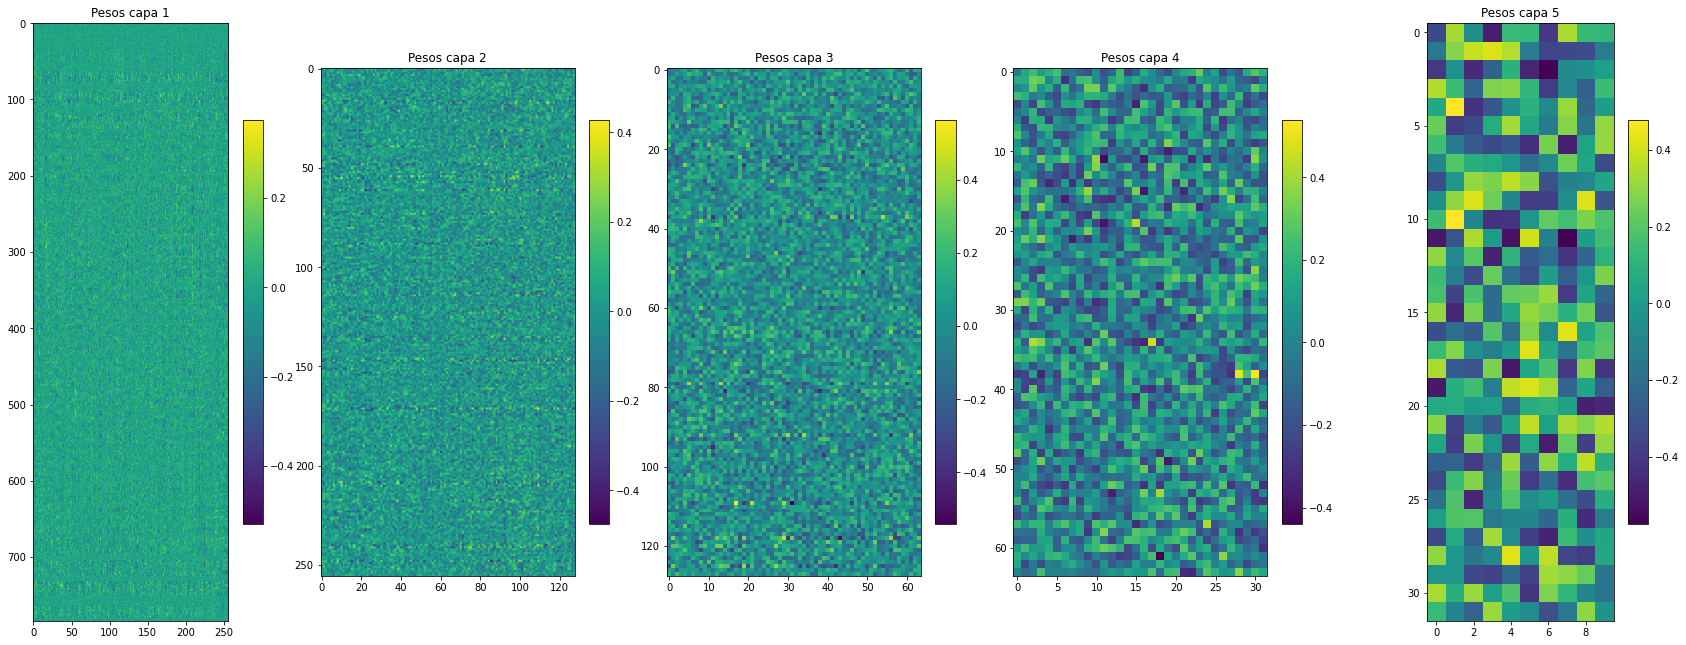

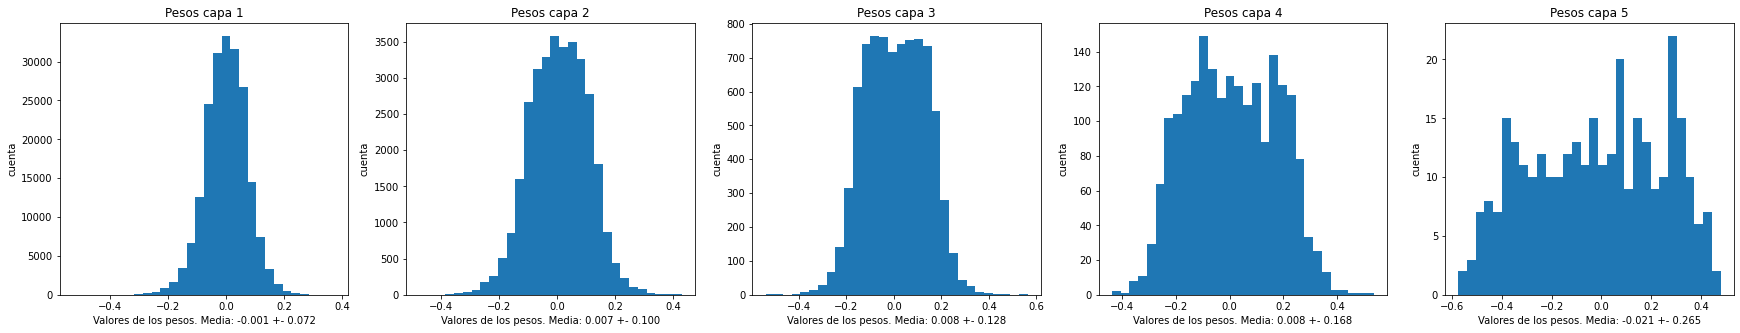

In [13]:
def plot_weights(model):
  layers = [l for l in model.layers if l.name.startswith('dense')]
  n_img_show = len(layers)
  plt.figure(figsize=(30, 11))
  cnt = 1
  for layer in layers:
      plt.subplot(1, n_img_show, cnt)
      plt.imshow(layer.get_weights()[0])
      plt.title(f'Pesos capa {cnt}')
      plt.colorbar(fraction=0.07)
      cnt += 1

def plot_weights_hist(model):
  layers = [l for l in model.layers if l.name.startswith('dense')]
  n_img_show = len(layers)
  plt.figure(figsize=(30, 5))
  cnt = 1
  for layer in layers:
    if layer.name.startswith('dense'):
      plt.subplot(1, n_img_show, cnt)
      plt.hist(layer.get_weights()[0].flatten(), bins=30)
      plt.title(f'Pesos capa {cnt}')
      mean = np.mean(layer.get_weights()[0])
      std = np.std(layer.get_weights()[0])
      plt.xlabel(f'Valores de los pesos. Media: {mean:.3f} +- {std:.3f}')
      plt.ylabel('cuenta')
      cnt +=1

plot_weights(model)
plot_weights_hist(model)

## Regularización del modelo con L2
Crea un modelo nuevo exactamente igual que el anterior y añade regularización L2 en todas las capas (menos en la de salida, como es obvio). Prueba distintos valores (0.1, 0.01 y 0.001) y observa cual es el comportamiento.



In [17]:
tf.keras.backend.clear_session()
n_epochs = 50

# Crear modelo
model_with_l2 = keras.Sequential()  #crear modelo
model_with_l2.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_l2.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_l2.add(Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_l2.add(Dense(units=32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_l2.add(Dense(units=10, activation='softmax',kernel_regularizer=tf.keras.regularizers.L2(0.01)))

# Compilamos el modelo
model_with_l2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Entrenamos
hist = model_with_l2.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1,
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/50
118/118 [==============================] - 3s 16ms/step - loss: 1.7752 - accuracy: 0.8458 - val_loss: 1.0524 - val_accuracy: 0.8992
Epoch 2/50
118/118 [==============================] - 2s 15ms/step - loss: 0.9935 - accuracy: 0.9104 - val_loss: 0.9505 - val_accuracy: 0.9104
Epoch 3/50
118/118 [==============================] - 2s 15ms/step - loss: 0.9266 - accuracy: 0.9211 - val_loss: 0.9034 - val_accuracy: 0.9253
Epoch 4/50
118/118 [==============================] - 2s 15ms/step - loss: 0.8940 - accuracy: 0.9251 - val_loss: 0.9409 - val_accuracy: 0.9040
Epoch 5/50
118/118 [==============================] - 2s 14ms/step - loss: 0.8805 - accuracy: 0.9259 - val_loss: 0.8542 - val_accuracy: 0.9307
Epoch 6/50
118/118 [==============================] - 2s 14ms/step - loss: 0.8595 - accuracy: 0.9302 - val_loss: 0.8882 - val_accuracy: 0.9124
Epoch 7/50
118/118 [==============================] - 2s 15ms/step - loss: 0.8548 - accuracy: 0.9293 - val_loss: 0.8321 - val_accuracy: 0.9342

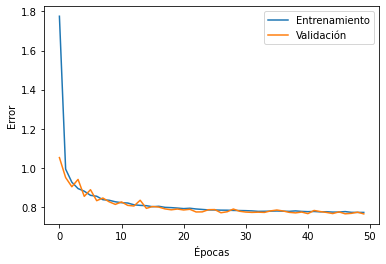

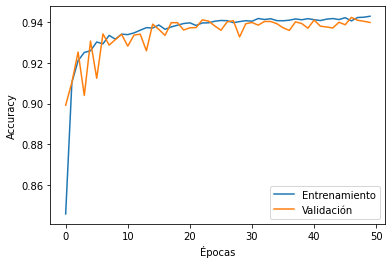

In [18]:
plot_curves(hist.history)

con un valor muy grande el error del entrenamiento será muy grande, porque va a ser tan rrígido que no le voy a dar capacidad de apredizaje. El histograma al rededor de =0,000000 pero porque no aprende 
Con un peso muy pequeño, el rango sigue estando al rededor de 0 pero no tan rígido, 
Viendo los pesas vemos si son altos o bajos, no determinamos si sobreajusta. 
Si tengo pesas altos es que la regularización no está haciendo efecto. 
Pesos pequeños recordemos que hacen que estemos en la parte lineal de la sigmoide.

In [21]:
tf.keras.backend.clear_session()
n_epochs = 50

# Crear modelo
model_with_l2 = keras.Sequential()  #crear modelo
model_with_l2.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_l2.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model_with_l2.add(Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model_with_l2.add(Dense(units=32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model_with_l2.add(Dense(units=10, activation='softmax',kernel_regularizer=tf.keras.regularizers.L2(0.001)))

# Compilamos el modelo
model_with_l2.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Entrenamos
hist = model_with_l2.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1,
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/50
118/118 [==============================] - 2s 16ms/step - loss: 1.0626 - accuracy: 0.8686 - val_loss: 0.5107 - val_accuracy: 0.9393
Epoch 2/50
118/118 [==============================] - 2s 14ms/step - loss: 0.4714 - accuracy: 0.9458 - val_loss: 0.4590 - val_accuracy: 0.9414
Epoch 3/50
118/118 [==============================] - 2s 14ms/step - loss: 0.4180 - accuracy: 0.9544 - val_loss: 0.4064 - val_accuracy: 0.9517
Epoch 4/50
118/118 [==============================] - 2s 15ms/step - loss: 0.3802 - accuracy: 0.9602 - val_loss: 0.3690 - val_accuracy: 0.9587
Epoch 5/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3590 - accuracy: 0.9629 - val_loss: 0.3499 - val_accuracy: 0.9637
Epoch 6/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3406 - accuracy: 0.9653 - val_loss: 0.3434 - val_accuracy: 0.9619
Epoch 7/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3324 - accuracy: 0.9654 - val_loss: 0.3337 - val_accuracy: 0.9634

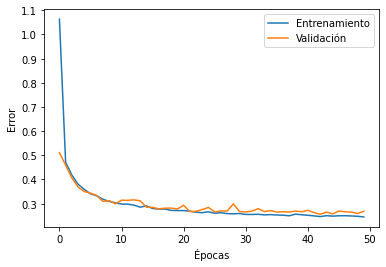

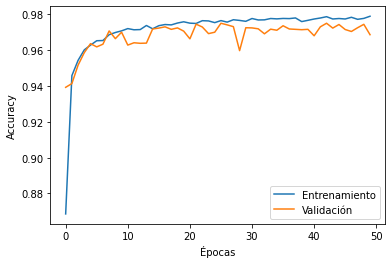

In [22]:
plot_curves(hist.history)

### Evaluación del modelo con regularización L2

In [ ]:
plot_curves(hist.history)

### Visualización de los pesos

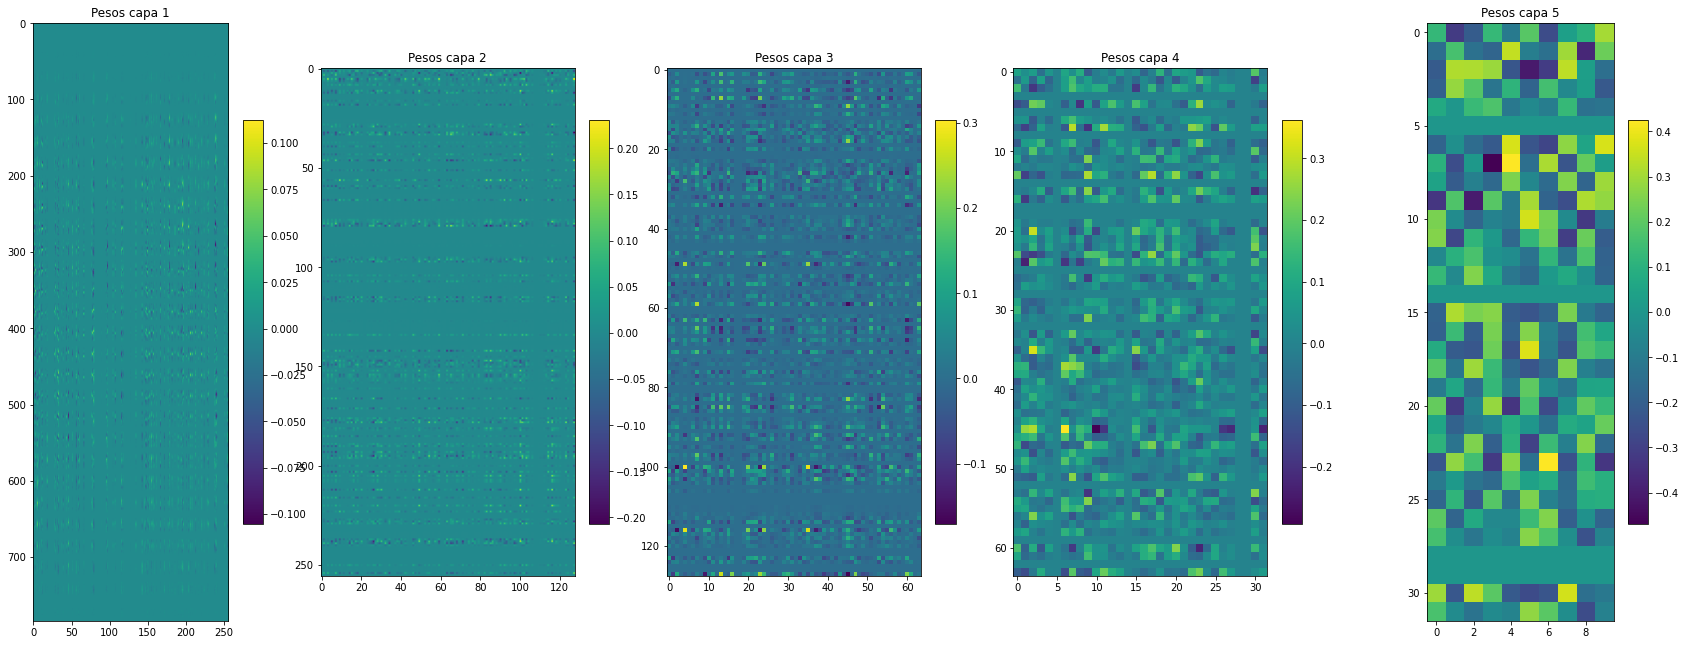

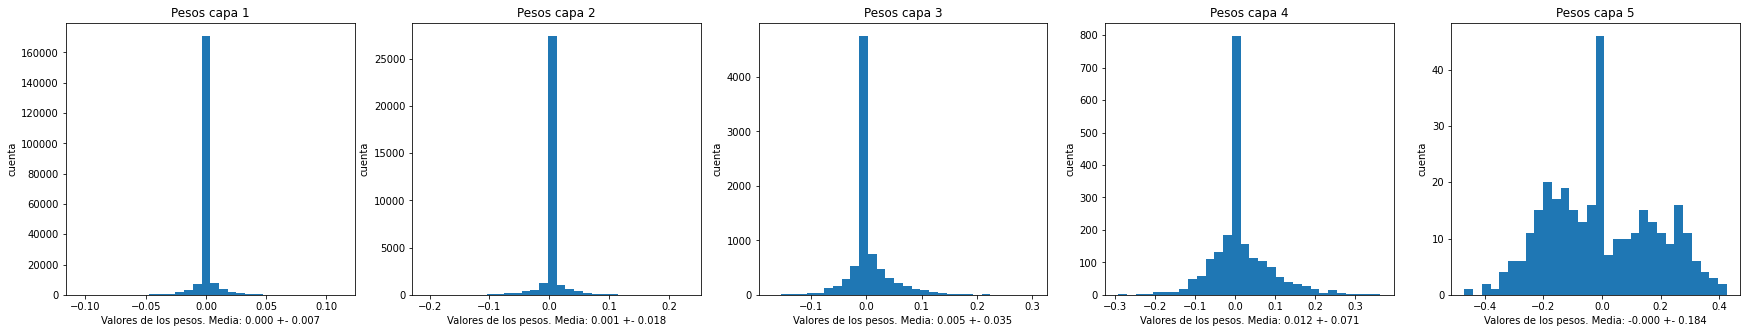

In [19]:
plot_weights(model_with_l2)
plot_weights_hist(model_with_l2)

aqui vemos que nos falla la distribución, probablemente habria que cambiar como estan los bins. Antes estaban entre -+4, ahora los valores son cercanos a 0.

## Regularización del modelo con Dropout
Ahora crea el mismo modelo pero añade dropout. Prueba distintos valores de dropout.

In [25]:
tf.keras.backend.clear_session()

# Crear modelo
n_epochs = 25

model_with_dp = keras.Sequential()  #crear modelo
model_with_dp.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(units=32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_with_dp.add(Dropout(0.4))
model_with_dp.add(Dense(units=10, activation='softmax',kernel_regularizer=tf.keras.regularizers.L2(0.01)))

# Compilamos el modelo
model_with_dp.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

# Entrenamos
hist = model_with_dp.fit(X_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=n_epochs,
                         verbose=1, 
                         shuffle=True, 
                         validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 3s 19ms/step - loss: 2.1553 - accuracy: 0.5895 - val_loss: 1.1291 - val_accuracy: 0.8440
Epoch 2/25
118/118 [==============================] - 2s 17ms/step - loss: 1.3043 - accuracy: 0.7985 - val_loss: 0.9976 - val_accuracy: 0.9022
Epoch 3/25
118/118 [==============================] - 2s 17ms/step - loss: 1.2302 - accuracy: 0.8370 - val_loss: 0.9483 - val_accuracy: 0.9147
Epoch 4/25
118/118 [==============================] - 2s 17ms/step - loss: 1.1953 - accuracy: 0.8458 - val_loss: 0.9639 - val_accuracy: 0.9067
Epoch 5/25
118/118 [==============================] - 2s 17ms/step - loss: 1.1757 - accuracy: 0.8521 - val_loss: 0.9144 - val_accuracy: 0.9198
Epoch 6/25
118/118 [==============================] - 2s 18ms/step - loss: 1.1584 - accuracy: 0.8557 - val_loss: 0.9301 - val_accuracy: 0.9140
Epoch 7/25
118/118 [==============================] - 2s 17ms/step - loss: 1.1505 - accuracy: 0.8582 - val_loss: 0.9073 - val_accuracy: 0.9242

### Evaluación del modelo con Dropout

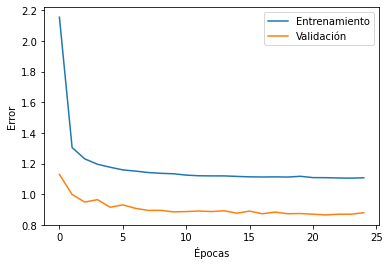

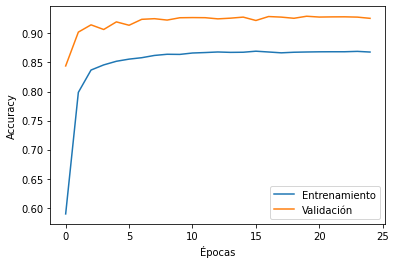

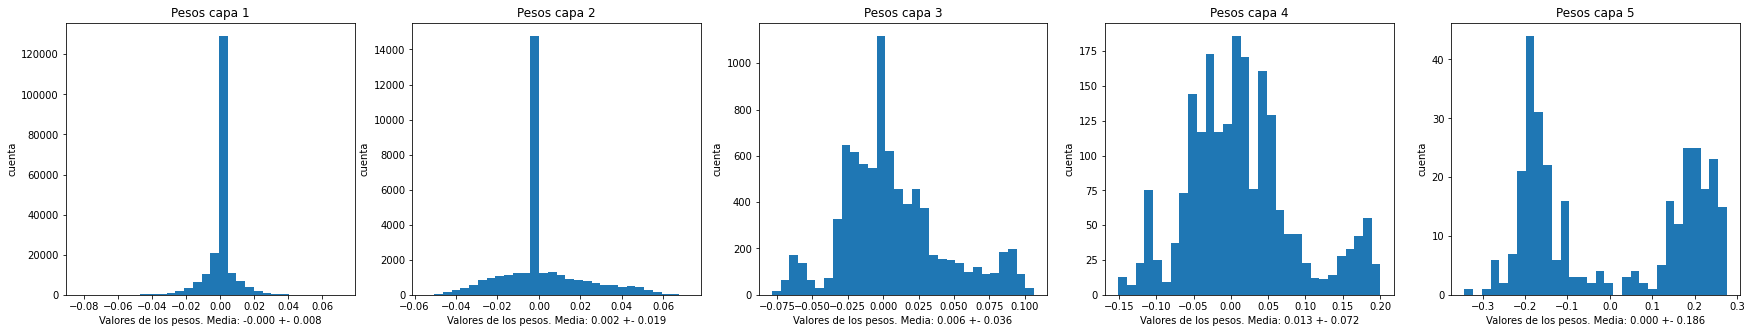

In [26]:
# Plots
plot_curves(hist.history)
# plot_weights(model_with_dp)
plot_weights_hist(model_with_dp)

de 0.2
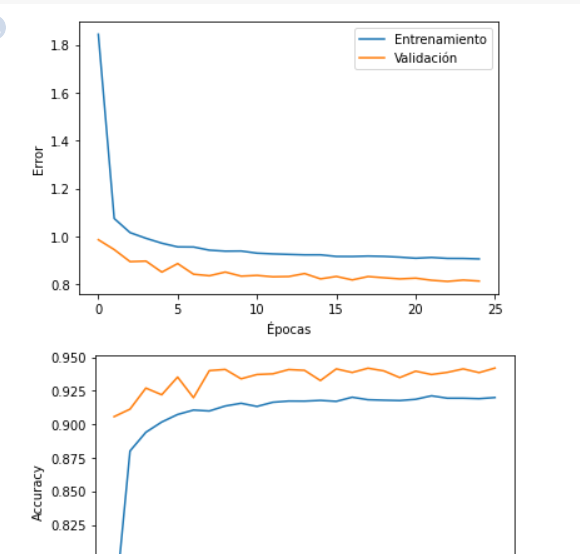